<a href="https://colab.research.google.com/github/Daalma7/ProbabilidadOposiciones/blob/main/CalculadoraProbabilidadesOposiciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculadora de probabilidades para oposiciones // exámenes donde los temas se extraigan por sorteo

¡Hola! Este es un pequeño proyecto donde podrás calcular la probabilidad de que aparezca al menos 1 tema estudiado en un exámen donde haya un determinado número de temas y se extraigan un subconjunto de ellos para desarrollar.

Para que tú puedas calcular dicha probabilidad, dejo aquí la fórmula. Habiendo $N$ temas, extrayendo $n$ bolas y habiéndote estudiado $x$ temas, la probabilidad de que al menos salga uno es:

$$P[\text{Al menos uno}]= 1-\prod_{i=0}^{n-1} \frac{N-x-i}{N-i} $$

Como ejemplo, si hay 100 temas, estudias 20 y se extraen 4 bolas, la probabilidad sería:

$$P[\text{Al menos uno}]= 1-\prod_{i=0}^{4-1} \frac{100-20-i}{100-i}=1-\prod_{i=0}^{3} \frac{80-i}{100-i}=1-\left(\frac{80}{100}\times \frac{79}{99}\times \frac{78}{98}\times \frac{77}{97} \right)\approx 0.5967 \text{ (Un 59.67%) }$$  


Además, en el código también se calcula una cantidad "óptima" de temas a estudiar. Esta cantidad, también llamada "punto de rodilla" o "knee point" es la cantidad de temas a partir de la cual, si se estudia un tema más, se consigue un incremento en la probabilidad menor a la proporción que supone estudiar dicho tema.  

Por ejemplo, si tenemos $N=100$ temas, estudiar un tema supone estudiar un $1\%$ del total de temas. La cantidad de temas óptima de temas a estudiar será aquella que al estudiar un tema más (estudiando un $1\%$ más de temas) suponga un incremento en la probabilidad de que aparezca al menos un tema de los estudiados menor a un $1\%$.

AVISO: Esta cantidad "óptima" de temas no es la "mejor". A más temas estudies, más probabilidades tendrás de no salir con el examen en blanco siempre ;)

---  

Para calcular tus probabilidaes, introduce la cantidad de temas, y el número de temas (bolas) que se extraen.

In [14]:
NUM_TEMAS = 71 # Introduce antes del "#" el número de temas totales (por ejemplo, 100)
NUM_BOLAS = 4 #Introduce antes del "#" el número de temas que se extraen (por ejemplo, 4)

Tras especificarlo, en la barra superior selecciona: Entorno de ejecución &rarr; Ejecutar todas.

In [15]:
#@title Importe de librerías necesarias y cálculo de probabilidades y óptimo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set_theme()

dict_probs = {}
dict_acum = {}

punto_optimo_medio = None
optimo_medio_aux = 100.0 / NUM_TEMAS

for i in range(NUM_TEMAS + 1):
    if i == 0:
        dict_probs[i] = 0
    else:
        dict_probs[i] = 100 * (1 - np.prod([float(NUM_TEMAS - i - j) / float(NUM_TEMAS - j) for j in range(0, NUM_BOLAS)]))
        dict_acum[i] = dict_probs[i] - dict_probs[i-1]
        if dict_acum[i] < optimo_medio_aux and punto_optimo_medio is None:
            punto_optimo_medio = i-1

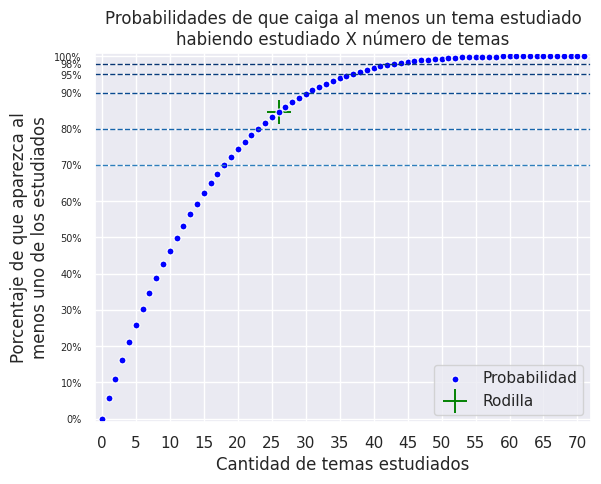

In [16]:
#@title Gráfico de probabilidades de que caiga al menos un tema estudiado habiendo estudiado X número de temas
probs_df = pd.DataFrame(dict_probs.items(), columns=['Temas', 'Porcentaje'])
cmap = mpl.colormaps.get_cmap('Blues')

sns.lineplot(x=[-1.0, NUM_TEMAS+1], y=[70.0, 70.0], color=cmap(0.7), linewidth=1.0, linestyle='dashed')
sns.lineplot(x=[-1.0, NUM_TEMAS+1], y=[80.0, 80.0], color=cmap(0.8), linewidth=1.0, linestyle='dashed')
sns.lineplot(x=[-1.0, NUM_TEMAS+1], y=[90.0, 90.0], color=cmap(0.9), linewidth=1.0, linestyle='dashed')
sns.lineplot(x=[-1.0, NUM_TEMAS+1], y=[95.0, 95.0], color=cmap(0.95), linewidth=1.0, linestyle='dashed')
sns.lineplot(x=[-1.0, NUM_TEMAS+1], y=[98.0, 98.0], color=cmap(0.98), linewidth=1.0, linestyle='dashed')
sns.scatterplot(x=[punto_optimo_medio], y=[dict_probs[punto_optimo_medio]], s=300, color="green", marker="+", label="Rodilla")
sns.scatterplot(data=probs_df, x="Temas", y="Porcentaje", s=100, color="blue", marker=".", label="Probabilidad")

plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 98, 100], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 98, 100])
plt.xticks([x for x in range(0, NUM_TEMAS+1, int(round(NUM_TEMAS+1, -2)/20))], [x for x in range(0, NUM_TEMAS+1, int(round(NUM_TEMAS+1, -2)/20))])
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y/100))
)
plt.yticks(fontsize=7)
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc="lower right")
plt.xlabel("Cantidad de temas estudiados")
plt.xlim([-1, NUM_TEMAS+1])
plt.ylabel("Porcentaje de que aparezca al\nmenos uno de los estudiados")
plt.ylim([-1, 101])
plt.title("Probabilidades de que caiga al menos un tema estudiado\nhabiendo estudiado X número de temas")
plt.show()

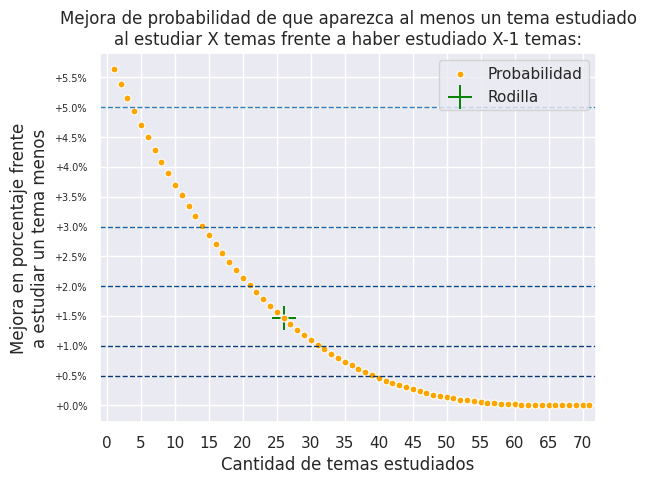

In [17]:
#@title Gráfico de mejora en probabilidad estudiando un tema más frente a estudiar un tema menos
if dict_acum[1] > 5:
    sns.lineplot(x=[-1.0, NUM_TEMAS+1], y=[5.0, 5.0], color=cmap(0.7), linewidth=1.0, linestyle='dashed')
if dict_acum[1] > 3:
    sns.lineplot(x=[-1.0, NUM_TEMAS+1], y=[3.0, 3.0], color=cmap(0.8), linewidth=1.0, linestyle='dashed')
if dict_acum[1] > 2:
    sns.lineplot(x=[-1.0, NUM_TEMAS+1], y=[2.0, 2.0], color=cmap(0.9), linewidth=1.0, linestyle='dashed')
if dict_acum[1] > 1:
    sns.lineplot(x=[-1.0, NUM_TEMAS+1], y=[1.0, 1.0], color=cmap(0.95), linewidth=1.0, linestyle='dashed')
if dict_acum[1] > 0.5:
    sns.lineplot(x=[-1.0, NUM_TEMAS+1], y=[0.5, 0.5], color=cmap(0.98), linewidth=1.0, linestyle='dashed')
probs_df = pd.DataFrame(dict_acum.items(), columns=['Temas', 'Porcentaje'])
sns.scatterplot(x=[punto_optimo_medio], y=[dict_acum[punto_optimo_medio]], s=300, color="green", marker="+", label="Rodilla")
sns.scatterplot(data=probs_df, x="Temas", y="Porcentaje", s=100, color="orange", marker=".", label="Probabilidad")
plt.yticks([x/2.0 for x in range(int(dict_acum[1]*2), -1, -1)], [x/2.0 for x in range(int(dict_acum[1]*2), -1, -1)])
plt.xticks([x for x in range(0, NUM_TEMAS+1, int(round(NUM_TEMAS+1, -2)/20))], [x for x in range(0, NUM_TEMAS+1, int(round(NUM_TEMAS+1, -2)/20))])
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda y, _: '{:+.1%}'.format(y/100))
)
plt.yticks(fontsize=7)
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc="upper right")
plt.xlabel("Cantidad de temas estudiados")
plt.xlim([-1, NUM_TEMAS+1])
plt.ylabel("Mejora en porcentaje frente\na estudiar un tema menos")
plt.title("Mejora de probabilidad de que aparezca al menos un tema estudiado\nal estudiar X temas frente a haber estudiado X-1 temas:")
plt.show()

In [18]:
#@title Tabla completa con todas las probabilidades de que caiga al menos un tema estudiado, habiendo estudiado X número de temas
print(f"\nProbabilidades de que caiga al menos un tema estudiado, habiendo estudiado X número de temas:\n")
print("+-------+------------+")
print("| Temas | Porcentaje |")
print("+-------+------------+")
for i in range(NUM_TEMAS + 1):
    print(f"| {i:>{5}} | {dict_probs[i]:>{9}.5f}% |")
print("+-------+------------+")


Probabilidades de que caiga al menos un tema estudiado, habiendo estudiado X número de temas:

+-------+------------+
| Temas | Porcentaje |
+-------+------------+
|     0 |   0.00000% |
|     1 |   5.63380% |
|     2 |  11.02616% |
|     3 |  16.18406% |
|     4 |  21.11441% |
|     5 |  25.82400% |
|     6 |  30.31951% |
|     7 |  34.60754% |
|     8 |  38.69457% |
|     9 |  42.58698% |
|    10 |  46.29105% |
|    11 |  49.81294% |
|    12 |  53.15875% |
|    13 |  56.33443% |
|    14 |  59.34584% |
|    15 |  62.19877% |
|    16 |  64.89886% |
|    17 |  67.45167% |
|    18 |  69.86265% |
|    19 |  72.13717% |
|    20 |  74.28047% |
|    21 |  76.29768% |
|    22 |  78.19387% |
|    23 |  79.97396% |
|    24 |  81.64280% |
|    25 |  83.20511% |
|    26 |  84.66554% |
|    27 |  86.02860% |
|    28 |  87.29873% |
|    29 |  88.48024% |
|    30 |  89.57736% |
|    31 |  90.59420% |
|    32 |  91.53478% |
|    33 |  92.40301% |
|    34 |  93.20269% |
|    35 |  93.93754% |
|    36

In [19]:
#@title Tabla completa con todas las mejoras en probabilidad si estudias X temas frente a estudiar X-1 temas
print(f"\nMejora de porcentaje de que aparezca al menos un tema estudiado al estudiar X temas frente a haber estudiado X-1 temas:\n")
print("+-------+------------+")
print("| Temas | Mejora Pr. |")
print("+-------+------------+")
for i in range(1,NUM_TEMAS + 1):
    print(f"| {i:>{5}} | {dict_acum[i]:>{9}.5f}% |")
print("+-------+------------+")


Mejora de porcentaje de que aparezca al menos un tema estudiado al estudiar X temas frente a haber estudiado X-1 temas:

+-------+------------+
| Temas | Mejora Pr. |
+-------+------------+
|     1 |   5.63380% |
|     2 |   5.39235% |
|     3 |   5.15790% |
|     4 |   4.93035% |
|     5 |   4.70959% |
|     6 |   4.49552% |
|     7 |   4.28803% |
|     8 |   4.08703% |
|     9 |   3.89241% |
|    10 |   3.70407% |
|    11 |   3.52190% |
|    12 |   3.34580% |
|    13 |   3.17568% |
|    14 |   3.01142% |
|    15 |   2.85292% |
|    16 |   2.70009% |
|    17 |   2.55281% |
|    18 |   2.41099% |
|    19 |   2.27452% |
|    20 |   2.14329% |
|    21 |   2.01722% |
|    22 |   1.89619% |
|    23 |   1.78009% |
|    24 |   1.66884% |
|    25 |   1.56232% |
|    26 |   1.46042% |
|    27 |   1.36306% |
|    28 |   1.27013% |
|    29 |   1.18151% |
|    30 |   1.09712% |
|    31 |   1.01684% |
|    32 |   0.94058% |
|    33 |   0.86823% |
|    34 |   0.79968% |
|    35 |   0.73484% |
|   

¡Gracias por utilizarme!  

Créditos: David Villar Martos ([Link a Github](https://github.com/Daalma7))